In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import norm, multivariate_normal

In [2]:
X = pd.read_csv('wine.data', sep=",", header=None)

In [3]:
X.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 'Proline']

In [5]:
X.columns = ['Winery'] + features

In [6]:
y = X['Winery']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
def plot_bivariate(feature_1, feature_2):
    
    data= []
    
    for winery in [1,2,3]:
    
        winery_filter = X_train['Winery'] == winery
        x1 = X_train[winery_filter][feature_1].tolist()
        x2 = X_train[winery_filter][feature_2].tolist()
        
        data.append((x1,x2))
    
    for winery_number, item in enumerate(data):
        

        plt.scatter(item[0],item[1], label='Winery '+ str(winery_number+1))
    
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.legend()
    plt.show()

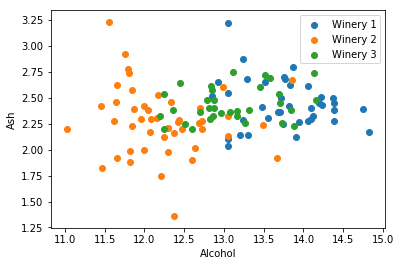

In [9]:
plot_bivariate('Alcohol', 'Ash')

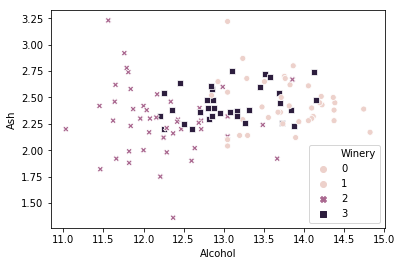

In [10]:
sns.scatterplot(data=X_train, x='Alcohol', y='Ash', style='Winery', hue='Winery')

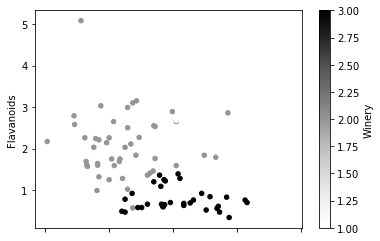

In [41]:
X_train.plot.scatter('Alcohol', 'Flavanoids', c='Winery')

In [12]:
def mean_and_cov(x, features):
    
    mean = x[features].mean()
    cov = x[features].cov()

    return mean, cov

In [13]:
mean, cov = mean_and_cov(X_test, ['Alcohol', 'Ash'])

In [14]:
rv = multivariate_normal(mean, cov)

In [15]:
rv.pdf([1, 3])

2.669063281942315e-74

In [16]:
x1_inputs = np.linspace(10,15,100)
x2_inputs = np.linspace(0,5,100)

In [17]:
X, Y = np.meshgrid(x1_inputs, x2_inputs)
Z = np.zeros((x1_inputs.size, x2_inputs.size))

In [18]:
for i in range(x1_inputs.size):
    for j in range(x2_inputs.size):
        Z[i,j] = rv.pdf([X[i,j],Y[i,j]])

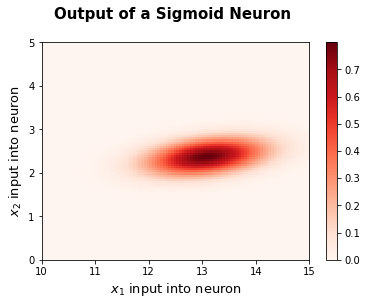

In [40]:
plt.pcolor(X, Y, Z, cmap='Reds')
plt.colorbar()

plt.title('Output of a Sigmoid Neuron \n', fontsize=15, fontweight='bold')
plt.xlabel('$x_1$ input into neuron', fontsize=13)          
plt.ylabel('$x_2$ input into neuron', fontsize=13)
           
plt.show()
plt.close()

In [39]:
def fit_generative_model(df, features):

    mean = []
    cov = []
    pi = []
    
    total_number_of_wines = df.shape[0]
    
    for i in [0,1,2]:     
    
        mean.append(df[df['Winery'] == i+1][features].mean())
        
        cov.append(df[df['Winery'] == i+1][features].cov())
    
        # NB: The loop and list is zero indexed, but the name of the winery is not.
        number_of_wines_in_winery = df[df['Winery'] == i+1].shape[0]                      
    
        pi.append(number_of_wines_in_winery/total_number_of_wines)
    
   
    return mean, cov, pi

In [21]:
def predict_model(df, features):
    
    mean, cov, pi = fit_generative_model(X_train, features)

    predictions = []
    
    for index, row in df[features].iterrows():
        
        probabilities = []
        
        for i,p in enumerate(pi):
            
            probabilities.append(p*multivariate_normal(mean[i], cov[i]).pdf(row))
                 
        prediction = np.argmax(probabilities)
        
        # NB: The loop and list is zero indexed, but the name of the winery is not. This is why one is added.
        predictions.append(prediction+1)
        
    return predictions

In [32]:
predictions = predict_model(X_test, ['Alcohol', 'Ash', 'Proline'])
correct_labels = y_test.tolist()

accuracy_score(correct_labels, predictions)

0.8813559322033898